In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def show_image(fname, path='./image/', size=(20,20)):
    """读取*.png图片并显示"""
    plt.figure(figsize=size)
    plt.imshow(plt.imread(path+fname))
    plt.axis('off')
    plt.show()

In [3]:
def show_describe(data):
    """输出数据的基本信息"""
    _mean = 0.0 if data.mean() < 1e-11 else  data.mean()
    _std = data.std()
    _min = data.min()
    _max = data.max()
    _norm_1 = np.linalg.norm(data, ord=1)
    _norm_2 = np.linalg.norm(data, ord=2)
    if 1-_norm_2 < 1e-11: _norm_2 = 1.0
    print('mean={0}, std={1},'.format(_mean, _std,))
    print('min={0}, max={1},'.format(_min, _max,))
    print('l1_norm={0}, l2_norm={1}'.format(_norm_1, _norm_2))    

# 特征工程是什么？

有这么一句话在业界广泛流传：数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。那特征工程到底是什么呢？顾名思义，其本质是一项工程活动，目的是最大限度地从原始数据中提取特征以供算法和模型使用。通过总结和归纳，人们认为特征工程包括以下方面：

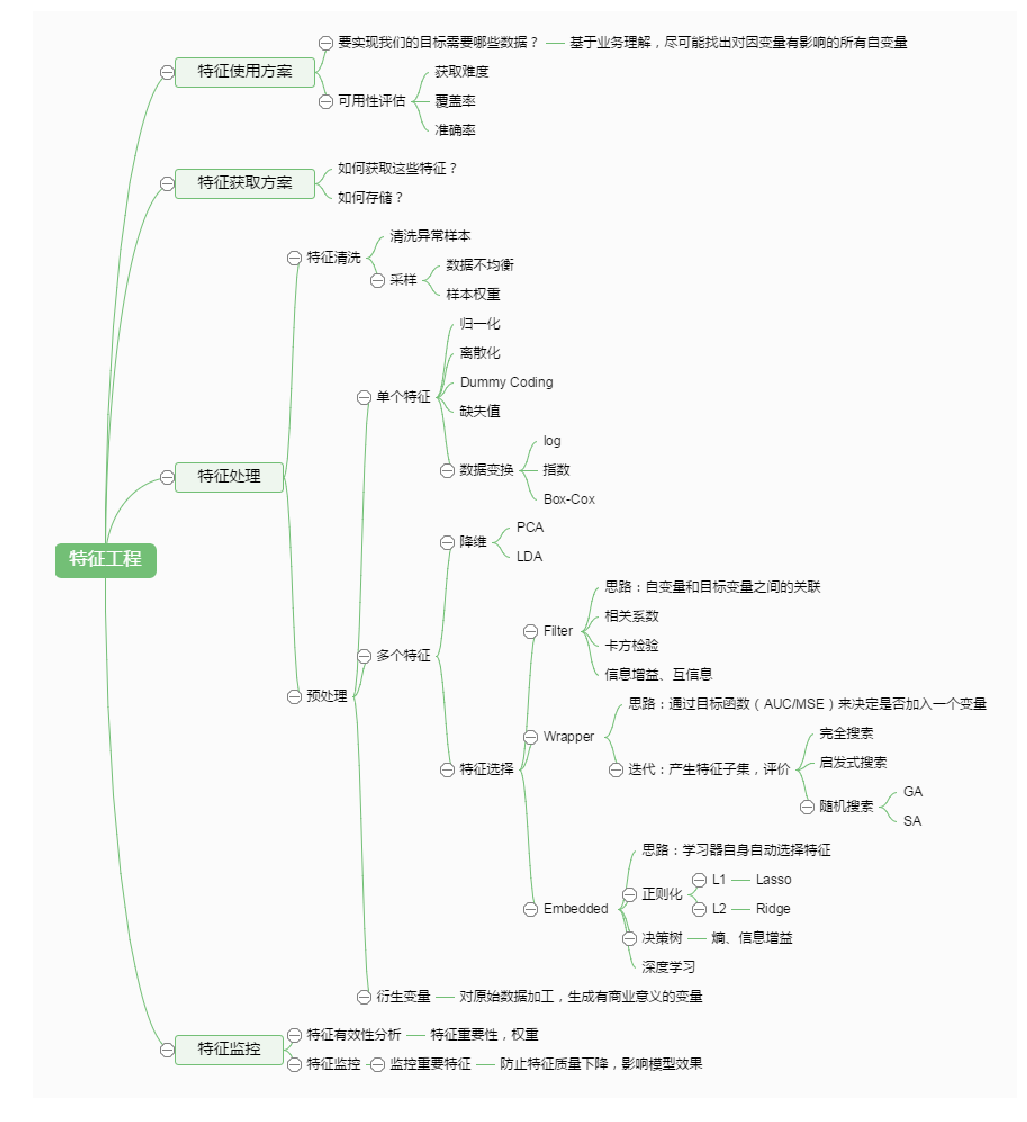

In [4]:
show_image('feature_engineering.png')

特征处理是特征工程的核心部分，sklearn提供了较为完整的特征处理方法，包括数据预处理，特征选择，降维等。首次接触到sklearn，通常会被其丰富且方便的算法模型库吸引，但是这里介绍的特征处理库也十分强大！

本文中使用sklearn中的IRIS（鸢尾花）数据集来对特征处理功能进行说明。IRIS数据集由Fisher在1936年整理，包含4个特征（Sepal.Length（花萼长度）、Sepal.Width（花萼宽度）、Petal.Length（花瓣长度）、Petal.Width（花瓣宽度）），特征值都为正浮点数，单位为厘米。目标值为鸢尾花的分类（Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），Iris Virginica（维吉尼亚鸢尾））。导入IRIS数据集的代码如下：

In [2]:
from sklearn.datasets import load_iris
#导入IRIS数据集
iris = load_iris()
#特征矩阵
print(iris.data[:5])
#目标向量
print(iris.target[:5])
#特征名称
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
iris_object = pd.DataFrame(iris.data, 
                           columns=iris.feature_names, 
                           dtype=np.str)

In [4]:
iris_object.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
index = np.random.randint(0, iris_object.shape[0], iris_object.shape[0]//2)

13

In [8]:
iris_object.size

600

In [16]:
str_tmp = pd.Series(np.random.randint(0, iris_object.size//2, iris_object.size), dtype='str')
for c in iris_object.columns:
    d_tmp = iris_object[c].astype('str')
    index = np.random.randint(0, d_tmp.size//2, d_tmp.size)
    d_tmp[index] = ''
    str_tmp = str_tmp+' '+d_tmp
    
for c in iris_object.columns:
    d_tmp = iris_object[c].astype('str')
    index = np.random.randint(0, d_tmp.size//2, d_tmp.size)
    d_tmp[index] = ''
    str_tmp = str_tmp+' '+d_tmp
    
str_tmp[:10]

0                159        
1    233 4.9  1.4    1.4 0.2
2              53   1.3     
3             253      3.1  
4           32 5.0  1.4     
5          241  3.9 1.7     
6                296        
7       111  3.4 1.5     0.2
8          206   1.4 0.2    
9             154        0.1
dtype: object

# 3 数据预处理

对文本型数据进行处理: 词向量, TF-IDF, 
以及常用的时间型数据进行处理: 时间段, 星期, 工作日/周末, 节假日, 

## 3.1 文本型数据
  
类别特征二值化的核心在于设定一个特殊值，等于特殊值的赋值为1，不等于特殊值的赋值为0，公式表达如下：
$$x'=\left \{
\begin{array}\\
1, & x \equiv catvalue\\
0, & x \not\equiv catvalue
\end{array} \right.
$$
对数据进行二值化的代码如下：

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [17]:

#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
str_cv = CountVectorizer().fit_transform(str_tmp)
print(obj_lbed[:10])
print(obj_tmp[:10].values)

AttributeError: 'float' object has no attribute 'lower'

## 3.2 LabelEncoder
用有序数字对对类别特征值进行编号   

如果类别特征值是有序的，则用数字代表顺序。如用数字表示房屋质量：分别用数字1、2、3表示质量差、中等、好
如果类别特征值是无序的，数字表示取值

In [8]:
from sklearn.preprocessing import LabelEncoder
#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
obj_lbed = LabelEncoder().fit_transform(obj_tmp)
print(obj_lbed[:10])
print(obj_tmp[:10].values)

[ 8  6  4  3  7 11  3  7  1  6]
['5.1' '4.9' '4.7' '4.6' '5.0' '5.4' '4.6' '5.0' '4.4' '4.9']


In [9]:
obj_tmp.astype('category').values
# hash后的序列 ['4.3', '4.4', '4.5', '4.6', ..., ]
# 再用数字编码 [    0,     1,     2,     3, ..., ]

[5.1, 4.9, 4.7, 4.6, 5.0, ..., 6.7, 6.3, 6.5, 6.2, 5.9]
Length: 150
Categories (35, object): [4.3, 4.4, 4.5, 4.6, ..., 7.4, 7.6, 7.7, 7.9]

In [10]:
obj_lbed2 = obj_tmp.astype('category').values.codes
print(obj_lbed2[:10])
print(obj_tmp[:10].values)

[ 8  6  4  3  7 11  3  7  1  6]
['5.1' '4.9' '4.7' '4.6' '5.0' '5.4' '4.6' '5.0' '4.4' '4.9']


## 3.3 对低基数类别型特征——哑编码
* 存储要求高，通常要求K <10（低基数，low-cardinality ） 

由于IRIS数据集的特征皆为定量特征，故使用其目标值进行哑编码（实际上是不需要的）。使用preproccessing库的OneHotEncoder类时要注意的是其输入必须是数值型数据，所以要先对类别型变量数字化(LabelEncoder)，再进行OneHot, 对数据进行哑编码的代码如下：

In [11]:
from sklearn.preprocessing import OneHotEncoder
#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
obj_lbed = LabelEncoder().fit_transform(obj_tmp)
obj_ohe = OneHotEncoder().fit_transform(obj_lbed.reshape(-1, 1))
print(obj_lbed[:10])
print(obj_ohe[:10])
print(type(obj_ohe))

[ 8  6  4  3  7 11  3  7  1  6]
  (0, 8)	1.0
  (1, 6)	1.0
  (2, 4)	1.0
  (3, 3)	1.0
  (4, 7)	1.0
  (5, 11)	1.0
  (6, 3)	1.0
  (7, 7)	1.0
  (8, 1)	1.0
  (9, 6)	1.0
<class 'scipy.sparse.csr.csr_matrix'>


In [12]:
obj_ohe_df = pd.get_dummies(obj_tmp, prefix=obj_tmp.name)
# pd.get_dummies()函数可以直接对str格式处理，并返回一个OneHotEncoder后的DF
print(obj_ohe_df.dtypes[:5])
# 自动使用uint8,uint16,...以节省内存
print(obj_ohe_df.iloc[:,0].value_counts())
# 查看前5行, 前5列
obj_ohe_df.iloc[:5,:5]

sepal length (cm)_4.3    uint8
sepal length (cm)_4.4    uint8
sepal length (cm)_4.5    uint8
sepal length (cm)_4.6    uint8
sepal length (cm)_4.7    uint8
dtype: object
0    149
1      1
Name: sepal length (cm)_4.3, dtype: int64


,sepal length (cm)_4.3,sepal length (cm)_4.4,sepal length (cm)_4.5,sepal length (cm)_4.6,sepal length (cm)_4.7
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,0


## 3.4 对高基数类别型特征——先降维再哑编码
对高基数（high-cardinality）类别型特征：通常有成百上千个 不同的取值（如邮政编码、街道名称…）   
可先降维/聚类： 1维 -> K维，K为聚类的类别数   
再按对低基数类别型特征——哑编码进行处理
常用的聚类降维方法：PCA、xgboost的叶子结点等

## 3.4 对高基数类别型特征——均值编码

对高基数（high-cardinality）类别型特征：通常有成百上千个 不同的取值（如邮政编码、街道名称…）   
均值编码：将特征每个可能的取值k(共有K种取值)，编码为它对应的标签取c值的概率，即
$$p(y=c|x=k)
$$
属于有监督编码方式，可用于分类和回归 

In [13]:
import utils_other

In [14]:
iris_object['target'] = iris.target
train = iris_object.copy()
train[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal length (cm)_5.0,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,1,0


In [15]:
#均值编码, 有监督的编码方式
mean_encoder = utils_other.MeanEncoder(['sepal length (cm)'],target_type='classification')
obj_me = mean_encoder.fit_transform(train,train['target'] )
obj_me[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal length (cm)_5.0,target,sepal length (cm)_pred_0,sepal length (cm)_pred_1,sepal length (cm)_pred_2
0,5.1,3.5,1.4,0.2,0,0,0.873661,0.125515,0.000824
1,4.9,3.0,1.4,0.2,0,0,0.666667,0.166667,0.166667
2,4.7,3.2,1.3,0.2,0,0,0.512628,0.243686,0.243686
3,4.6,3.1,1.5,0.2,0,0,0.666667,0.166667,0.166667
4,5.0,3.6,1.4,0.2,1,0,0.748970,0.250206,0.000824
5,5.4,3.9,1.7,0.4,0,0,0.777868,0.206323,0.015809
6,4.6,3.4,1.4,0.3,0,0,0.666667,0.166667,0.166667
7,5.0,3.4,1.5,0.2,1,0,0.748970,0.250206,0.000824
8,4.4,2.9,1.4,0.2,0,0,0.666667,0.166667,0.166667
9,4.9,3.1,1.5,0.1,0,0,0.666667,0.166667,0.166667


In [16]:
t_size = obj_me.shape[0]
x_k = (obj_me['sepal length (cm)']=='5.1').sum()
x_k_and_y_c = ((obj_me['sepal length (cm)']=='5.1') & (obj_me['target']==0)).sum()
print("总数据量有{0}个".format(t_size))
print("x=='5.1'有{0}个, p(x=='5.1') = {1}".format(x_k, x_k/t_size))
print("x=='5.1'且y==0有{0}个, p(x=='5.1',y==0)  = {1}".format(x_k_and_y_c, x_k_and_y_c/t_size))
print("mean_encoder p(x=='5.1' | y==0) = {0}".format((x_k_and_y_c/x_k)))
print("mean_encoder 'sepal length (cm)_pred_0' = {0}".format((x_k_and_y_c/x_k)))

总数据量有150个
x=='5.1'有9个, p(x=='5.1') = 0.06
x=='5.1'且y==0有8个, p(x=='5.1',y==0)  = 0.05333333333333334
mean_encoder p(x=='5.1' | y==0) = 0.8888888888888888
mean_encoder 'sepal length (cm)_pred_0' = 0.8888888888888888


基本思路与原理：

平均数编码是一种有监督（supervised）的编码方式，适用于分类和回归问题。为了简化讨论，以下的所有代码都以分类问题作为例子。

假设在分类问题中，目标y一共有C个不同类别，具体的一个类别用target表示；某一个定性特征variable一共有K个不同类别，具体的一个类别用k表示。

**先验概率（prior）**：数据点属于某一个target(y)的概率:$P(y=target)$

**后验概率（posterior）**：该定性特征属于某一类时，数据点属于某一个target(y)的概率:$P(target=y|variable=k)$

算法的基本思想：将variable中的每一个k，都表示为（估算的）它所对应的目标y值概率：
$\hat{P}(target=y|variable=k)$。（估算的结果都用“^”表示，以示区分）

因此，整个数据集将增加（C-1）列。是C-1而不是C的原因：
$\sum_{i}^{}{\hat{P}(target = y_i | variable = k)} =1$，所以最后一个$y_i$的概率值必然和其他$y_i$的概率值线性相关。在线性模型、神经网络以及SVM里，不能加入线性相关的特征列。如果你使用的是基于决策树的模型（gbdt、rf等），个人仍然不推荐这种over-parameterization。

先验概率与后验概率的计算：

因为我们没有上帝视角，所以我们在计算中，需要利用已有数据估算先验概率和后验概率。我们在此使用的具体方法被称为Empirical Bayes（Empirical Bayes method）。和一般的贝叶斯方法（如常见的Laplace Smoothing）不同，我们在估算先验概率时，会使用已知数据的平均值，而不是\frac{1}{C} 。

接下来的计算就是简单的统计：

$\hat{P}(y = target) = \frac{(y = target)的数量}{y的总数}$

$\hat{P}(target = y | variable = k) = \frac{(y = target 并且 variable = k)的数量}{(variable = k)的数量}$

（其实我本来可以把公式用sigma求和写出来的，但是那样不太方便直观理解）

使用不同的统计方法，以上两个公式的计算方法也会不同。

权重：

我们已经得到了先验概率估计$\hat{P}(y = target)$和后验概率估计$\hat{P}(target = y | variable = k)$。最终编码所使用的概率估算，应当是先验概率与后验概率的一个凸组合（convex combination）。由此，我们引入先验概率的权重$\lambda$ 来计算编码所用概率$\hat{P}$：

$$\hat{P} = \lambda * \hat{P}(y = target) + (1 - \lambda) * \hat{P}(target = y | variable = k)$$
或：$$\hat{P} = \lambda * prior + (1 - \lambda) * posterior$$

直觉上，$\lambda$ 应该具有以下特性：

如果测试集中出现了新的特征类别（未在训练集中出现），那么$\lambda = 1$。
一个特征类别在训练集内出现的次数越多，后验概率的可信度越高，其权重也越大。

在贝叶斯统计学中，$\lambda$ 也被称为shrinkage parameter。

权重函数：

我们需要定义一个权重函数，输入是特征类别在训练集中出现的次数n，输出是对于这个特征类别的先验概率的权重$\lambda$。假设一个特征类别的出现次数为n，以下是一个常见的权重函数：

$$\lambda(n) = \frac{1}{1 + e^{(n - k)/f}} $$

这个函数有两个参数：  

k：当n = k时，$\lambda = 0.5$，先验概率与后验概率的权重相同；当n > k时，$\lambda < 0.5$。

f：控制函数在拐点附近的斜率，f越大，“坡”越缓。

图示：k=1时，不同的f对于函数图象的影响。

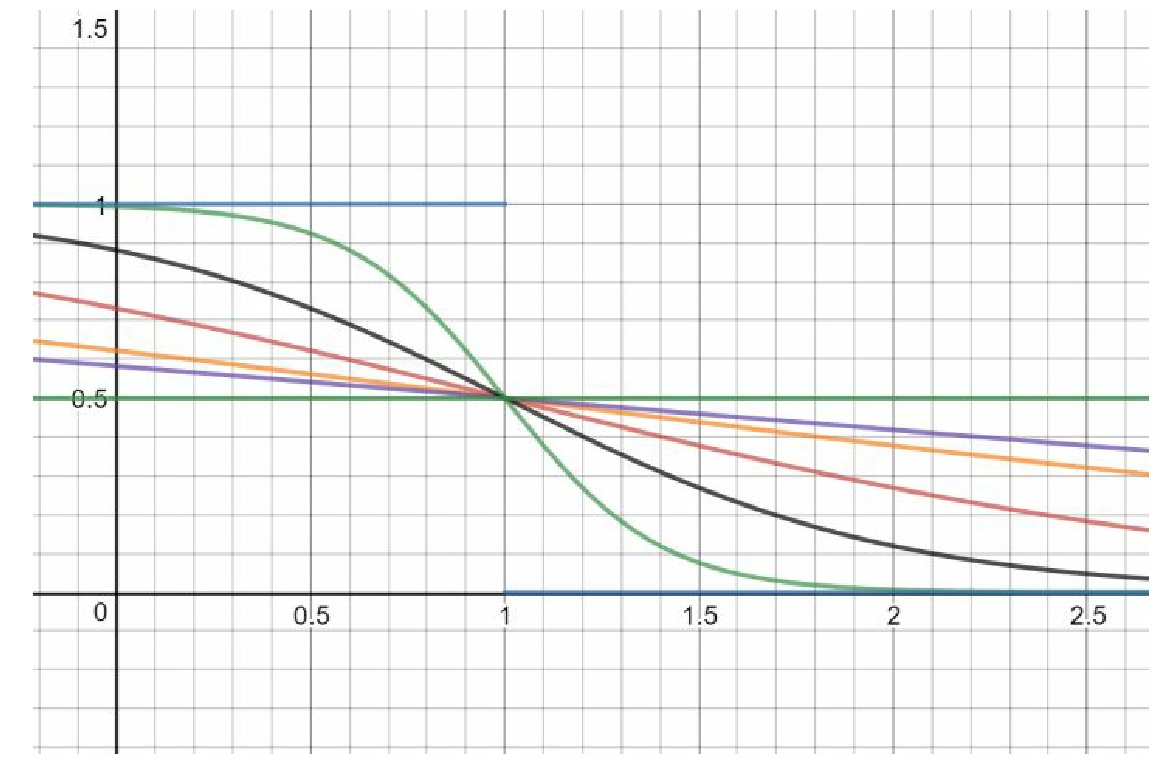

In [42]:
show_image('mean_encoding_shrinkage_parameter.png')

当(freq_col - k) / f太大的时候，np.exp可能会产生overflow的警告。我们不需要管这个警告，因为某一类别的频数极高，分母无限时，最终先验概率的权重将成为0，这也表示我们对于后验概率有充足的信任。

延伸

以上的算法设计能解决多个（>2）类别的分类问题，自然也能解决更简单的2类分类问题以及回归问题。

还有一种情况：定性特征本身包括了不同级别。例如，国家包含了省，省包含了市，市包含了街区。有些街区可能就包含了大量的数据点，而有些省却可能只有稀少的几个数据点。这时，我们的解决方法是，在empirical bayes里加入不同层次的先验概率估计。



代码实现

原论文并没有提到，如果fit时使用了全部的数据，transform时也使用了全部数据，那么之后的机器学习模型会产生过拟合。因此，我们需要将数据分层分为n_splits个fold，每一个fold的数据都是利用剩下的(n_splits - 1)个fold得出的统计数据进行转换。n_splits越大，编码的精度越高，但也更消耗内存和运算时间。


编码完毕后，是否删除原始特征列，应当具体问题具体分析。